# DATA20001 Deep Learning 2018 - Exercise 3

**Due Sunday November 25, before 23:59**


## Exercise 3.1 (2 points)

Perform convolution on the given image with three different $3\times 3$ kernels: a) blurring kernel, b) edge detection kernel, and c) your own kernel (you can make anything up, and try to explain what it does to the image).  2D convolution is defined as:

$$S(i,j) = \sum_m \sum_n I(i+m, j+n) K(m,n),$$

where $I$ is the image and $K$ is the kernel. The sums are taken over the kernel's dimensions: in this case $m=-1, 0, 1$ and $n = -1, 0, 1$ to get the kernel centered.

See slides 19 and 20 in from [Lecture 5](https://moodle.helsinki.fi/pluginfile.php/2184375/mod_resource/content/2/lecture5.pdf) for how the results should roughly look like.  Don't worry if they are not exactly the same.  Especially for the edge detection, the picture in the slides has been processed by taking the absolute value and a threshold.

Don't use PyTorch or any ready-made convolution function, instead implement the convolution by hand with numpy. No neural networks needed, just perform the convolution as the formula says. Perform what is called "valid" padding. Use a stride of 1. <span style="background-color: yellow">Please return the code and one image for each of the three kernels showing the result of applying that kernel to the given image</span>.

Below is some code to load the image, and to specify the kernels for a) and b) cases.

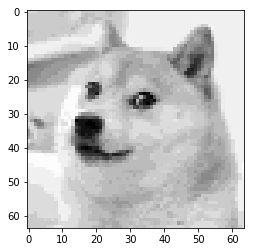

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

I = plt.imread('images/doge.png')
import matplotlib.pyplot as plt
plt.imshow(I, cmap="gray")
plt.show()

In [2]:
# Blurring kernel
K_blur = np.ones((3,3))/9.0
print(K_blur)

# Edge detection
K_edge = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])
print(K_edge)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


## Exercise 3.2 (4 points)

The task is to classify images of items of clothing from the FashionMNIST dataset using CNNs.  This is the same as in Exercise 2.2, except with CNN instead of MLP.

<span style="background-color: yellow">The task is to train a CNN model, i.e., a neural network with convolutional layers to classify images into the ten classes</span>.  You should train on the training set loaded below, and you should use the validation set to calculate the accuracy of the model (i.e., the percentage of correctly classified images of the validation set).

Your network should have at least one convolutional layer, and at least one fully connected layer (you need one to get the final output anyway).  <span style="background-color: yellow">In addition you should</span>:

1. Try different setups, e.g., varying the number of layers, the sizes of kernels, strides, pooling, etc, and comment on what worked and what not.
2. Play with the training parameters, e.g., what optimizer to use or minibatch sizes, and report the differences.
3. Try **at least two** of the following methods mentioned in lecture 6 and <span style="background-color: yellow">report what improvement to the accuracy (if any) you could achieve with these</span>:
  - dataset augmentation, e.g., random crops or flips - Hint: you can add them as transforms to the dataset (see https://pytorch.org/docs/stable/torchvision/transforms.html)

  - batch normalization

  - dropout for fully connected layers.
4. Visualise the weights of the first convolutional layer, can the weights be interpreted somehow?

*Hint:* you can reuse most of the training and validation code from Exercise 2.2, or the PyTorch tutorial from lecture 4, just redefine the `Net` class.

Below are some commands to get you started.

In [ ]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Let's load the dataset, fortunately FashionMNIST is also available directly in torchvision
batch_size = 32
train_dataset = datasets.FashionMNIST('./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = datasets.FashionMNIST('./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
if torch.cuda.is_available():
    print('Using GPU!')
    device = torch.device('cuda')
else:
    print('Using CPU')
    device = torch.device('cpu')